# Iris Flower Classification

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os

# Importing the Dataset

In [2]:
dataset = pd.read_csv('C:/Yogesh/My Projects/Iris/iris.csv')

In [3]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Class          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
dataset.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Class'],
      dtype='object')

In [6]:
dataset.count()

SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Class            150
dtype: int64

In [7]:
dataset.shape

(150, 5)

In [8]:
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Class            0
dtype: int64

In [9]:
dataset.value_counts

<bound method DataFrame.value_counts of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm           Class
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]>

# Visualization

# 1) Scatter Plot

In [10]:
iris=dataset

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

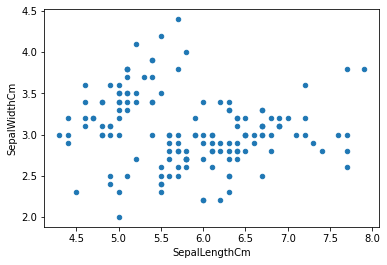

In [11]:
iris.plot(kind="scatter",x="SepalLengthCm",y="SepalWidthCm")

# 2) Joint Plot

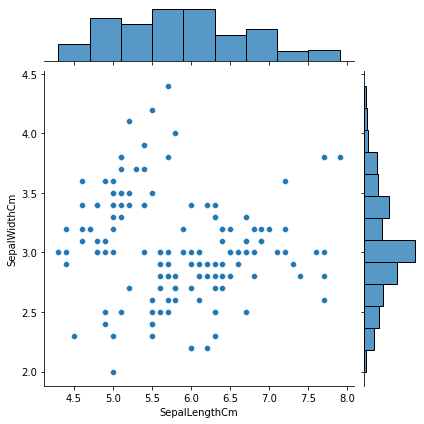

In [12]:
sns.jointplot(data=iris,x="SepalLengthCm",y="SepalWidthCm")

# 3) Density Plot KDE

C:\Users\yoges\anaconda3\lib\site-packages\seaborn\distributions.py:1182: UserWarning: The following kwargs were not used by contour: 'size'
  cset = contour_func(


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

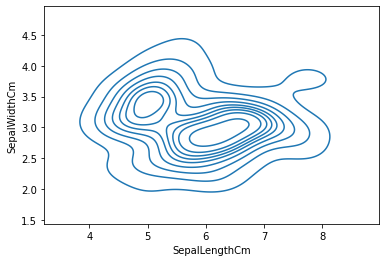

In [13]:
sns.kdeplot(data=iris,x="SepalLengthCm",y="SepalWidthCm",size=5)

# 4) Facet Grid

C:\Users\yoges\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


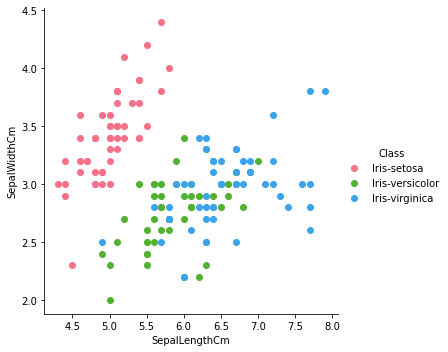

In [14]:
sns.FacetGrid(data=iris,hue="Class",palette="husl",size=5) \
    .map(plt.scatter,"SepalLengthCm","SepalWidthCm") \
    .add_legend()

# 5) BOXPLOT

<AxesSubplot:xlabel='Class', ylabel='PetalLengthCm'>

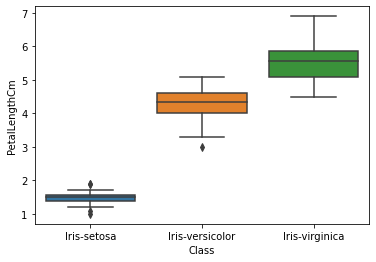

In [15]:
sns.boxplot(x="Class",y="PetalLengthCm",data=iris)

In [16]:
iris.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# 6) HEATMAP

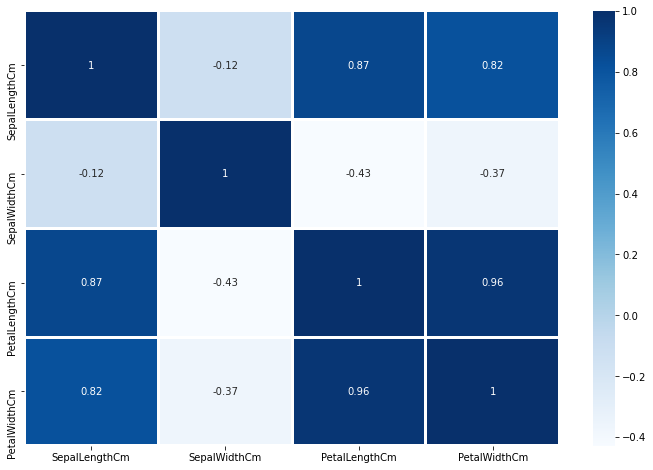

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(iris.corr(),annot=True,cmap="Blues",linewidth=2)
plt.show()

# 7) HISTOPLOT

Text(0.5, 1.0, 'PetalWidth Intervals')

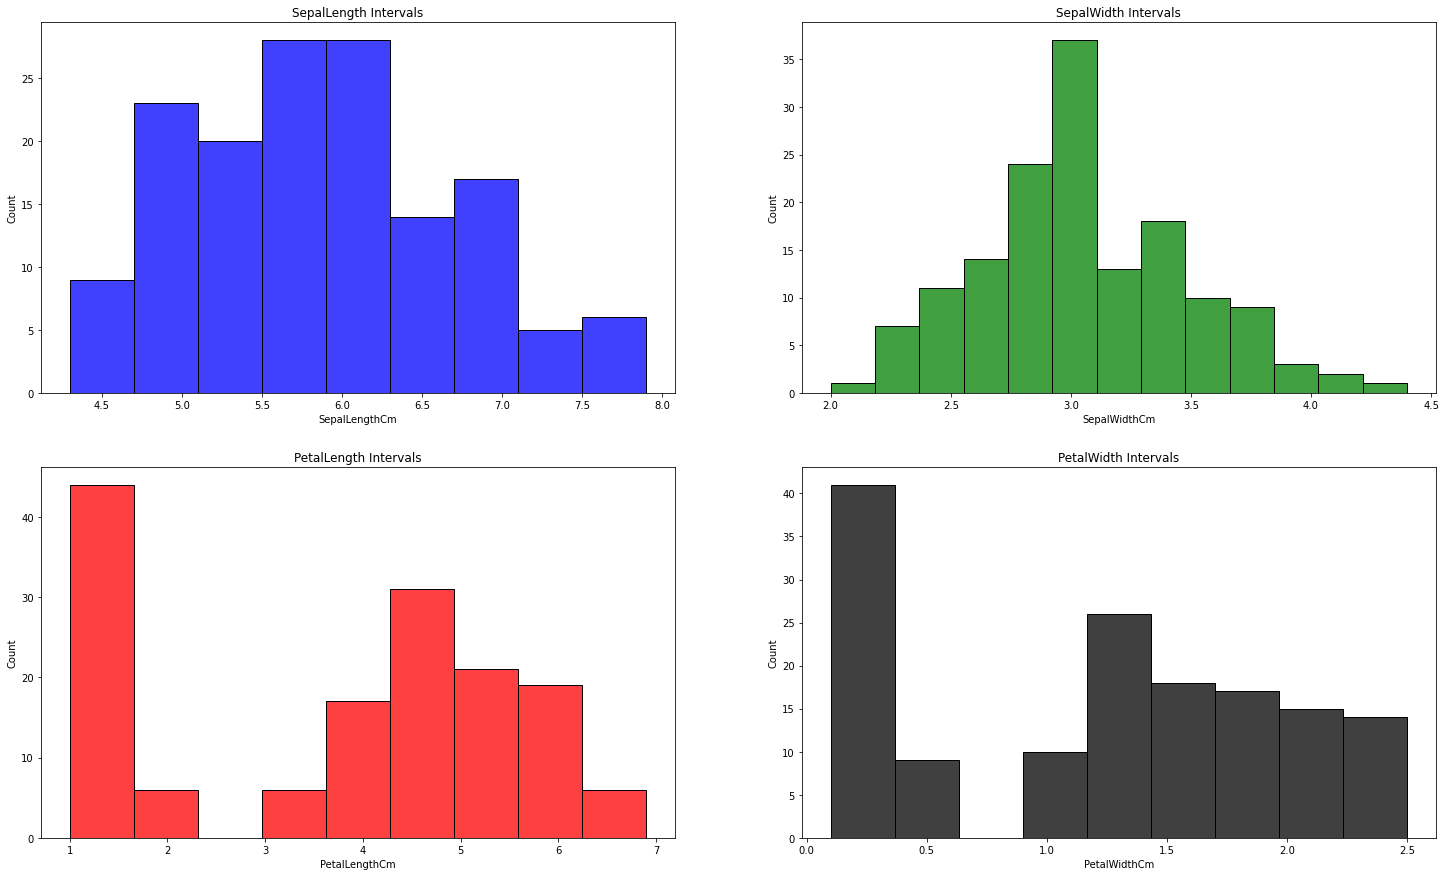

In [18]:
plt.figure(figsize=(25,15))

plt.subplot(2,2,1)
sns.histplot(iris['SepalLengthCm'], color="blue").set_title("SepalLength Intervals")

plt.subplot(2,2,2)
sns.histplot(iris['SepalWidthCm'], color="green").set_title("SepalWidth Intervals")

plt.subplot(2,2,3)
sns.histplot(iris['PetalLengthCm'], color="red").set_title("PetalLength Intervals")

plt.subplot(2,2,4)
sns.histplot(iris['PetalWidthCm'], color="black").set_title("PetalWidth Intervals")

# Training and Testing Data

In [19]:
x = iris.drop(columns="Class")
y = iris["Class"]

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)

In [21]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

120
30
120
30


# Models

# 1) KNeighbors Classification

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [23]:
y_pred = knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
print("Classification Report is: \n",classification_report(y_test,y_pred))
print("Confusion Matrix is: \n",confusion_matrix(y_test,y_pred))
print("Accuracy Score is: \n", knn.score(x_train,y_train)*100)


Classification Report is: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix is: 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy Score is: 
 96.66666666666667


# 2) Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6,random_state=123,criterion='entropy')
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [26]:
y_pred = dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('Classification Report is :\n',classification_report(y_test,y_pred))
print('Confusion Matrix is :\n',confusion_matrix(y_test,y_pred))

Classification Report is :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix is :
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [27]:
accuracy_score(y_test,y_pred)

1.0

# 3) Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
y_pred = rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('Classification Report is :\n',classification_report(y_test,y_pred))
print('Confusion Matrix is :\n',confusion_matrix(y_test,y_pred))
print('Training Score is :\n',rfc.score(x_train,y_train)*100)

Classification Report is :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

Confusion Matrix is :
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Training Score is :
 100.0


In [31]:
accuracy_score(y_test,y_pred)

0.9666666666666667